In [71]:
import pandas as pd
from statistics import mean,stdev
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans 


In [18]:
ipl=pd.read_csv("ipl_batsman.csv", index_col=None)
ipl
cur_ipl = pd.read_csv("current_batsman.csv")
ipl

,Player,BF,Mat,Inns,NO,Runs,HS,Ave,6s,SR,100,50,4s
0,V Kohli,3784,163,155,26,4948,113,38.35,177,130.76,4,34,434
1,RG Sharma,3429,173,168,27,4493,109*,31.86,184,131.02,1,34,379
2,G Gambhir,3404,154,152,16,4217,93,31.00,59,123.88,0,36,492
3,RV Uthappa,3135,165,159,15,4129,87,28.67,146,131.70,0,23,407
4,S Dhawan,3285,143,142,20,4058,95*,33.26,85,123.53,0,32,460
5,MS Dhoni,2906,175,158,58,4016,79*,40.16,186,138.19,0,20,275
6,DA Warner,2824,114,114,15,4014,126,40.54,160,142.13,3,36,401
7,CH Gayle,2650,112,111,14,3994,175*,41.17,292,150.71,6,24,323
8,AB de Villiers,2619,141,129,29,3953,133*,39.53,187,150.93,3,28,326
9,AM Rahane,2848,126,119,15,3427,103*,32.95,65,120.33,1,26,359


In [62]:
player=ipl['Player']
match=ipl['Mat']
innings=ipl['Inns']
not_out=ipl["NO"]
run=ipl["Runs"]
highest_score=ipl["HS"]
avg=ipl["Ave"]
ball=ipl['BF']
sr=ipl["SR"]
cen=ipl["100"]
hc=ipl["50"]
four=ipl["4s"]
six=ipl["6s"]


c_match=cur_ipl['match']
c_not_out=cur_ipl["NO"]
c_run=cur_ipl["Run"]
c_highest_score=cur_ipl["Hs"]
c_avg=cur_ipl["ave"]
c_ball=cur_ipl['BF']
c_sr=cur_ipl["SR"]
c_cen=cur_ipl["100"]
c_hc=cur_ipl["50"]
c_four=cur_ipl["4s"]
c_six=cur_ipl["6s"]   


In [63]:
Hard_Hit = ( four +  six)/ball
#print(Hard_Hit)
run_wicket = (run - (four*4+six*6))/(ball - (four + six))
#print(run_wicket)
max_avg = max(avg)
#print(max_avg)
max_sr = max(sr)
max_hard = max(Hard_Hit)
#print(max_hard)
max_run_wicket = max(run_wicket)

c_Hard_Hit = ( c_four +  c_six)/c_ball
c_run_wicket = (c_run - (c_four*4+c_six*6))/(c_ball - (c_four +c_six))
c_max_avg = max(c_avg)
#print(c_max_avg)
c_max_sr = max(c_sr)
c_max_hard = max(c_Hard_Hit)
#print(max_hard)
c_max_run_wicket = max(c_run_wicket)
(Hard_Hit)

0     0.161469
1     0.164188
2     0.161868
3     0.176396
4     0.165906
5     0.158637
6     0.198654
7     0.232075
8     0.195876
9     0.148876
10    0.159727
11    0.203556
12    0.190346
13    0.160121
14    0.193504
15    0.237288
16    0.172616
17    0.159902
18    0.137799
19    0.188935
20    0.170335
21    0.125306
22    0.148704
23    0.127444
24    0.182844
25    0.135266
26    0.158546
27    0.152323
28    0.173875
29    0.149869
30    0.230681
31    0.184290
32    0.161844
33    0.155046
34    0.175833
dtype: float64

In [64]:
cost_sr = [] 
for i in range(0,len(player)):
    loc_sr = (sr[i]/max_sr)
    cost_sr.append(loc_sr)
#print(cost_sr)

cost_avg = []
for i in range(0,len(player)):
    loc_avg = (avg[i]/max_avg)
    cost_avg.append(loc_avg) 
#print(cost_avg)    

cost_hard = []
for i in range(0,len(player)):
    loc_hard = (Hard_Hit[i]/max_hard)
    cost_hard.append(loc_hard)
#print(cost_hard)
    
cost_run_wicket = []
for i in range(0,len(player)):
    loc_run = (run_wicket[i]/max_run_wicket)
    cost_run_wicket.append(loc_run)  
#print(cost_run_wicket)
    
#FOR THE CURRENT FORM
c_cost_sr = [] 
for i in range(0,len(player)):
    c_loc_sr = (c_sr[i]/c_max_sr)
    c_cost_sr.append(c_loc_sr)

c_cost_avg = []
for i in range(0,len(player)):
    c_loc_avg = (c_avg[i]/c_max_avg)
    c_cost_avg.append(c_loc_avg)   

c_cost_hard = []
for i in range(0,len(player)):
    c_loc_hard = (c_Hard_Hit[i]/c_max_hard)
    c_cost_hard.append(c_loc_hard)

c_cost_run_wicket = []
for i in range(0,len(player)):
    c_loc_run = (c_run_wicket[i]/c_max_run_wicket)
    c_cost_run_wicket.append(c_loc_run)
    
c_hc_match = []
for i in range(0,len(player)):
    c_loc_run = (c_hc[i]/c_match[i])
    c_hc_match.append(c_loc_run)
print(c_hc_match)    

[0.2857142857142857, 0.14285714285714285, 0.25, 0.0625, 0.25, 0.1875, 0.2857142857142857, 0.2727272727272727, 0.5, 0.06666666666666667, 0.125, 0.13333333333333333, 0.0, 0.1875, 0.18181818181818182, 0.35714285714285715, 0.0, 0.35714285714285715, 0.2, 0.1111111111111111, 0.125, 0.0, 0.2, 0.0, 0.0, 0.13333333333333333, 0.0, 0.0, 0.15384615384615385, 0.16666666666666666, 0.0, 0.42857142857142855, 0.0, 0.0625, 0.26666666666666666]


[0.9226190476190478, 1.0, 0.9047619047619049, 0.9464285714285715, 0.8452380952380953, 0.9404761904761905, 0.6785714285714286, 0.6607142857142857, 0.7678571428571429, 0.7083333333333334, 0.8928571428571429, 0.6726190476190477, 0.8690476190476192, 0.7321428571428572, 0.6488095238095238, 0.22619047619047622, 0.7261904761904763, 0.6011904761904763, 0.6488095238095238, 0.7202380952380952, 0.7321428571428572, 0.45833333333333337, 0.45833333333333337, 0.7083333333333334, 0.4345238095238096, 0.5059523809523809, 0.5357142857142857, 0.5595238095238095, 0.36904761904761907, 0.30952380952380953, 0.4047619047619048, 0.2619047619047619, 0.4285714285714286, 0.5535714285714286, 0.9821428571428573]


(array([ 2., 11., 16.,  6.]),
 array([0. , 0.3, 0.6, 0.9, 1.2]),
 <a list of 4 Patch objects>)

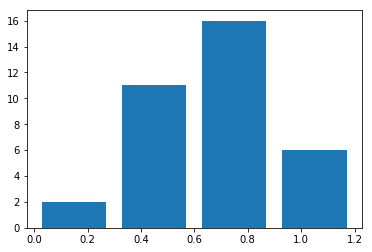

In [81]:
mean_inn = innings.mean()
#print(mean_inn)
x_fact = []
for i in range(0, len(player)):
        exp = innings[i]/mean_inn
        x_fact.append(exp)      
    


act_x_fact = []
m_x_fact = max(x_fact)
for i in range(len(player)):
    act_x_fact.append(x_fact[i]/m_x_fact)
print(act_x_fact)
std = (mean(act_x_fact)-min(act_x_fact))

bin = [0,0.3,0.6,0.9,1.2]
plt.hist(act_x_fact,bin, histtype = 'bar',rwidth=0.8)

In [82]:
# x_factarr=np.array(act_x_fact)
# mean_x_fact=x_factarr.mean()
# print(mean_x_fact)  

# x_fact_more=[]
# x_fact_less=[]
# for i in range(0, len(player)):
#     if(act_x_fact[i]>=mean_x_fact):
#         x_fact_more.append(act_x_fact[i])
#     else:
#         x_fact_less.append(x_fact[i])
# #print(x_fact_more)
# #print(x_fact_less)
# x_fact_morearr=np.array(x_fact_more)
# x_fact_lessarr=np.array(x_fact_less)
# x_fact_more_mean=x_fact_morearr.mean()
# x_fact_less_mean=x_fact_lessarr.mean()
# print(x_fact_more_mean)
# print(x_fact_less_mean)
# cost_x_fact=[]
# for i in range(0, len(player)):
#     if(x_fact[i]>=mean_x_fact):
#         cost_x_fact.append(1)
#     else:
#         cost_x_fact.append(0.5)
# #print(pd.Series(cost_x_fact, index=player))
# print(x_fact_more)
# x_fact_less

std

0.42568027210884357

In [86]:
std_x_fact = []
for i in range(len(player)):
    if(act_x_fact[i] > std):
        std_x_fact.append(1)
    else:
        std_x_fact.append(0.5)
    
std_x_fact


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.5,
 0.5,
 0.5,
 0.5,
 1,
 1,
 1]

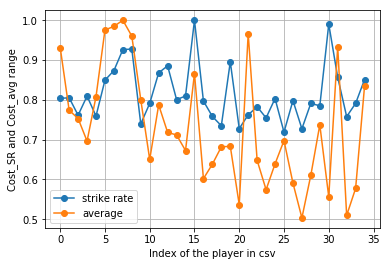

In [8]:
index = []
for i in range(len(player)):
    index.append(i)
import matplotlib.pyplot as plt
plt.plot(index,cost_sr,'-o')
plt.plot(index,cost_avg,'-o')
plt.xlabel("Index of the player in csv")
plt.ylabel("Cost_SR and Cost_avg range")

plt.grid()
plt.legend(['strike rate','average'])
plt.show()

Text(0,0.5,'Cost_Hard hitting and Cost_running range')

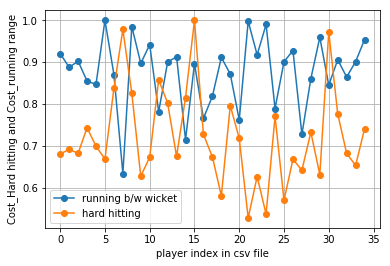

In [9]:
plt.plot(index,cost_run_wicket,'-o')
plt.plot(index,cost_hard,'-o')
plt.grid()
plt.legend(['running b/w wicket','hard hitting'])
plt.xlabel("player index in csv file")
plt.ylabel("Cost_Hard hitting and Cost_running range")

In [91]:
credit = []
for i in range(0,len(player)):
    credit.append(cost_sr[i] + cost_avg[i] + cost_hard[i]  + cost_run_wicket[i])
#print(pd.Series(credit, index=player))  

m_credit = np.array(credit)
max_credit = max(m_credit)
#FOR CURRENT FORM

c_credit = []
for i in range(0,len(player)):
    c_credit.append(c_cost_sr[i] + c_cost_avg[i] + c_cost_hard[i]  + c_cost_run_wicket[i])
#print(pd.Series(c_credit, index=player))

final_credit = []
for i in range(0,len(player)):
    final_cr = 0
    final_cr = credit[i]*std_x_fact[i]*(c_credit[i]/max_credit) + c_credit[i]
    final_credit.append(final_cr)
print(pd.Series(final_credit,index = player))


Player
V Kohli           5.472684
RG Sharma         4.501682
G Gambhir         4.895169
RV Uthappa        4.244368
S Dhawan          4.996297
MS Dhoni          6.462775
DA Warner         5.933563
CH Gayle          5.285376
AB de Villiers    6.813565
AM Rahane         4.272066
KD Karthik        5.589942
SR Watson         5.471987
YK Pathan         4.627820
AT Rayudu         5.299564
BB McCullum       4.766193
Risabh Pant       5.149011
Yuvraj Singh      2.775565
M Vijay           4.436629
MK Pandey         4.027932
KA Pollard        4.370459
PA Patel          4.413758
JP Duminy         3.602373
SV Samson         4.734907
RA Jadeja         3.824644
AJ Finch          4.189298
MK Tiwary         4.707613
WP Saha           3.937076
NV Ojha           3.797009
KK Nair           3.528652
F du Plessis      3.442601
GJ Maxwell        3.473342
KL Rahul          4.732740
Mandeep Singh     4.408092
DJ Bravo          5.072402
S Raina           5.059776
dtype: float64


In [92]:
credit_up = [] 
for i in range(0,len(player)):
    
        credit_up.append(final_credit[i]* std_x_fact[i])
d ={}
for i in range(len(player)):
    d.update({player[i]:credit_up[i]})
#print(d)
sorted_d = sorted(d.items(), key = lambda x: x[1], reverse = True)
sorted_d

[('AB de Villiers', 6.81356494536613),
 ('MS Dhoni', 6.462775371573413),
 ('DA Warner', 5.933563451314155),
 ('KD Karthik', 5.589941719876186),
 ('V Kohli', 5.472683643108127),
 ('SR Watson', 5.471987283241802),
 ('AT Rayudu', 5.299564354693162),
 ('CH Gayle', 5.285376485040336),
 ('DJ Bravo', 5.072402468038791),
 ('S Raina', 5.059776031988335),
 ('S Dhawan', 4.996297086246792),
 ('G Gambhir', 4.895169461338937),
 ('BB McCullum', 4.7661929089377475),
 ('SV Samson', 4.734907499541157),
 ('MK Tiwary', 4.707612548001688),
 ('YK Pathan', 4.62782003981526),
 ('RG Sharma', 4.501681894261759),
 ('M Vijay', 4.436628893562668),
 ('PA Patel', 4.413757640242659),
 ('Mandeep Singh', 4.4080923462066215),
 ('KA Pollard', 4.370459375808389),
 ('AM Rahane', 4.2720656967659245),
 ('RV Uthappa', 4.244368497475681),
 ('AJ Finch', 4.189298247683991),
 ('MK Pandey', 4.0279324102240865),
 ('WP Saha', 3.9370760543614205),
 ('RA Jadeja', 3.824643845947262),
 ('NV Ojha', 3.797009473854527),
 ('JP Duminy', 3.60

In [93]:
curr_opener=[]
for i in range(0, len(player)):
    c_b=(c_cost_sr[i]*30 +(c_cost_run_wicket[i])*10+ (c_hc[i]/c_match[i])*20 +c_cost_avg[i]*30+ c_cost_hard[i]*10)
    
    curr_opener.append(c_b)
#print(curr_opener)    
#print(pd.Series(opener, index=player))
#hc
c_o ={}
for i in range(len(player)):
    c_o.update({player[i]:curr_opener[i]})
#print(d)
sorted_co = sorted(c_o.items(), key = lambda x: x[1], reverse = True)

sorted_co

[('AB de Villiers', 78.42711203756234),
 ('Risabh Pant', 75.23766244645256),
 ('MS Dhoni', 74.52608068579802),
 ('KL Rahul', 73.58910511145115),
 ('DA Warner', 67.79655026650778),
 ('KD Karthik', 63.41206429095253),
 ('V Kohli', 63.367885300183445),
 ('AT Rayudu', 61.3062829438446),
 ('CH Gayle', 60.20752611472297),
 ('SR Watson', 60.01031349531037),
 ('S Dhawan', 58.11243703296436),
 ('G Gambhir', 57.458496743228835),
 ('S Raina', 56.940634097281375),
 ('DJ Bravo', 56.84796741367505),
 ('M Vijay', 55.68926535612097),
 ('SV Samson', 54.541972090101126),
 ('BB McCullum', 54.44348889472865),
 ('MK Tiwary', 53.57800635924229),
 ('F du Plessis', 50.62088305195354),
 ('KK Nair', 50.536299185743324),
 ('PA Patel', 49.97835649448786),
 ('RG Sharma', 48.856293816109236),
 ('Mandeep Singh', 47.38939155779514),
 ('YK Pathan', 47.147062745299806),
 ('MK Pandey', 46.75236393261683),
 ('KA Pollard', 45.934299537311645),
 ('AM Rahane', 45.92918512326876),
 ('RV Uthappa', 45.467680186070424),
 ('GJ M

In [94]:

opener=[]
for i in range(0, len(player)):
    b=(cost_sr[i]*30+cost_avg[i]*30+(hc[i]/innings[i])*20+cost_run_wicket[i]*10 +cost_hard[i]*10)
    opener.append(b)
print(opener)

add_opener = 0
for i in range(len(opener)):
    add_opener += opener[i]
mean_opener = add_opener/len(opener) 

final_opener = []
for i in range(len(opener)):
    final = 0
    final = opener[i]*std_x_fact[i]*(curr_opener[i]/mean_opener) + curr_opener[i]
    final_opener.append(final)
#print(final_opener)

# df = pd.DataFrame({"Opener":player, "Points":final_opener})
# df.to_csv("Opener_points.csv", encoding = 'utf8', index = False)

o ={}
for i in range(len(player)):
    o.update({player[i]:final_opener[i]})
#print(d)
sorted_o = sorted(o.items(), key = lambda x: x[1], reverse = True)

sorted_o

[72.45009370720103, 67.2170210525419, 66.01056735328429, 64.04955220091074, 66.97825349647806, 73.96017513294998, 79.1375172659964, 78.23323626371995, 79.07774853982961, 65.81162478955103, 61.52120418163337, 68.87599526750783, 66.9143785726601, 64.00780471365734, 62.15722568865177, 79.15814486911606, 58.86729972881993, 59.39267103122751, 59.62076835311431, 66.19205552528027, 54.519648824538486, 70.74697531106379, 60.95397185419381, 55.13549898056568, 62.42753644718784, 58.85057228422149, 58.961330648605966, 51.88905753083932, 61.22775408432622, 65.0285124153578, 66.33323296047826, 75.07484410144458, 54.87996584646322, 57.672697880097665, 67.88564980404445]


[('AB de Villiers', 173.57984817330077),
 ('MS Dhoni', 159.0942589700055),
 ('DA Warner', 150.113786245077),
 ('V Kohli', 133.80619535103432),
 ('CH Gayle', 132.47499446003044),
 ('SR Watson', 123.42568561390691),
 ('KD Karthik', 123.26665714111482),
 ('AT Rayudu', 121.51213121819674),
 ('Risabh Pant', 120.92561205528406),
 ('S Dhawan', 117.83021910762002),
 ('S Raina', 116.24696286553618),
 ('KL Rahul', 115.97083967713908),
 ('G Gambhir', 115.65119397671032),
 ('DJ Bravo', 107.15005060973489),
 ('M Vijay', 106.43565011123067),
 ('BB McCullum', 106.36392509362287),
 ('SV Samson', 105.54942169223173),
 ('MK Tiwary', 101.95490266035597),
 ('RG Sharma', 99.24121021536891),
 ('YK Pathan', 95.55034948700117),
 ('KA Pollard', 92.58344881826307),
 ('AM Rahane', 92.30505997475495),
 ('PA Patel', 91.78408371238497),
 ('RV Uthappa', 90.14834808707755),
 ('MK Pandey', 89.51868634265263),
 ('Mandeep Singh', 87.29148922716244),
 ('AJ Finch', 84.329387368575),
 ('JP Duminy', 81.59181417372875),
 ('F

In [95]:
curr_mid_order=[]
for i in range(0, len(player)):
    c_b=(c_cost_sr[i]*20 + (c_hc[i]/c_match[i])*10 + +c_cost_avg[i]*30+ c_cost_run_wicket[i]*25+ c_cost_hard[i]*15 )
    curr_mid_order.append(c_b)
    

c_mo ={}
for i in range(len(player)):
    c_mo.update({player[i]:curr_mid_order[i]})
#print(d)
sorted_cmo = sorted(c_mo.items(), key = lambda x: x[1], reverse = True)

#sorted_cmo
curr_mid_order
mid_order=[]
for i in range(0, len(player)):
    b=(cost_sr[i]*20 + (hc[i]/c_match[i])*10 + +cost_avg[i]*30+ cost_run_wicket[i]*25+ cost_hard[i]*15 )
    mid_order.append(b)
    
add_mid = 0
for i in range(len(mid_order)):
    add_mid += mid_order[i]
mean_mid = add_mid/len(mid_order) 

final_mid = []
for i in range(len(mid_order)):
    final_m = 0
    final_m = mid_order[i]*std_x_fact[i]*(curr_mid_order[i]/mean_mid) + curr_mid_order[i]
    final_mid.append(final_m)

    
# df =pd.DataFrame({"Middle": player, "Points": final_mid})  
# df.to_csv("middle_points.csv", encoding = 'utf-8', index = False)
    
mo ={}
for i in range(len(player)):
    mo.update({player[i]:final_mid[i]})
#print(d)
sorted_mo = sorted(mo.items(), key = lambda x: x[1], reverse = True)

sorted_mo    

[('AB de Villiers', 183.95663989789173),
 ('MS Dhoni', 169.72587194984447),
 ('DA Warner', 163.62856401203456),
 ('V Kohli', 150.56084984613364),
 ('KD Karthik', 137.0331141770913),
 ('CH Gayle', 134.8928255067145),
 ('G Gambhir', 131.89522463271652),
 ('S Dhawan', 129.9287267923587),
 ('SR Watson', 129.29343023414563),
 ('AT Rayudu', 128.34763845148694),
 ('S Raina', 120.07286019884785),
 ('Risabh Pant', 119.74866779280042),
 ('RG Sharma', 116.46741020206409),
 ('KL Rahul', 114.9105624960794),
 ('SV Samson', 114.56309945106793),
 ('DJ Bravo', 114.14328459665447),
 ('BB McCullum', 112.24999347561564),
 ('M Vijay', 111.52994064250608),
 ('MK Tiwary', 110.40243685189343),
 ('AM Rahane', 108.72324133550352),
 ('YK Pathan', 106.86799027742373),
 ('KA Pollard', 103.92110162678597),
 ('MK Pandey', 100.86179502813107),
 ('PA Patel', 100.633053683658),
 ('Mandeep Singh', 99.38592725642742),
 ('RV Uthappa', 99.04157143149538),
 ('AJ Finch', 98.49200380930579),
 ('JP Duminy', 98.0518933092402),


In [96]:
curr_finisher=[]
for i in range(0, len(player)):
    c_b=c_cost_sr[i]*35+c_cost_hard[i]*40+(c_not_out[i])*5 + c_cost_run_wicket[i]*15
    
    curr_finisher.append(c_b)
    
c_f ={}
for i in range(len(player)):
    c_f.update({player[i]:curr_finisher[i]})
#print(d)
sorted_cf = sorted(c_f.items(), key = lambda x: x[1], reverse = True)

sorted_cf    
finisher=[]
for i in range(0, len(player)):
    b=cost_sr[i]*35+cost_hard[i]*40+(not_out[i])*5 + cost_run_wicket[i]*15 
    
    finisher.append(b)
    
add_finisher = 0
for i in range(len(finisher)):
    add_finisher += finisher[i]
mean_finisher = add_finisher/len(finisher) 

final_finisher = []
for i in range(len(finisher)):
    final_f = 0
    final_f = finisher[i]*std_x_fact[i]*(curr_finisher[i]/mean_finisher) + curr_finisher[i]
    final_finisher.append(final_f)
    

# df =pd.DataFrame({"Finisher": player, "Points": final_finisher})  
# df.to_csv("finisher_points.csv", encoding = 'utf-8', index = False)
    
f ={}
for i in range(len(player)):
    f.update({player[i]:final_finisher[i]})
#print(d)
sorted_f = sorted(f.items(), key = lambda x: x[1], reverse = True)

sorted_f    


[('MS Dhoni', 364.37581299197285),
 ('DJ Bravo', 248.90142300080612),
 ('AB de Villiers', 223.4076549010344),
 ('YK Pathan', 215.75805567168482),
 ('KD Karthik', 214.25181452778173),
 ('RA Jadeja', 203.44007994661217),
 ('V Kohli', 181.17850565661956),
 ('S Raina', 178.82794928600447),
 ('MK Tiwary', 174.80285638658927),
 ('S Dhawan', 167.01777396705052),
 ('AT Rayudu', 166.81616606403696),
 ('KA Pollard', 166.36178883436185),
 ('RG Sharma', 164.0586861682683),
 ('DA Warner', 161.12484569540766),
 ('G Gambhir', 157.31405723799978),
 ('CH Gayle', 154.51955769354635),
 ('SR Watson', 151.92680772084083),
 ('WP Saha', 143.8927013734829),
 ('Mandeep Singh', 124.40685992869587),
 ('MK Pandey', 124.00184917392981),
 ('JP Duminy', 122.52017096285391),
 ('RV Uthappa', 120.0913731512806),
 ('BB McCullum', 119.9255640270271),
 ('Risabh Pant', 119.45441832533469),
 ('KL Rahul', 118.47826663587607),
 ('PA Patel', 116.08064022744973),
 ('AM Rahane', 113.25229184510472),
 ('SV Samson', 110.6090766337

In [97]:
cr=np.array(credit_up)
crmean=cr.mean()
crmeanup=[]
crmeanless=[]
for i in range(0,len(player)):
    if(credit_up[i]>=crmean):
        crmeanup.append(credit_up[i])
    else:
        crmeanless.append(credit_up[i])
crup=np.array(crmeanup)
crless=np.array(crmeanless)
crupmean=crup.mean()
crlessmean=crless.mean()
print(crupmean)
print(crlessmean)

5.110488354676386
3.2023932713223076


In [98]:
point=[]
for i in range(0,len(player)):
    if(credit_up[i]>=crupmean):
        point.append(10)
    elif(credit_up[i]<crupmean and credit_up[i]>=crmean ):
        point.append(9)
    elif(credit_up[i]<crmean and credit_up[i]>=crlessmean):
        point.append(8)
    else:
        point.append(7)
        
pd.Series(point, index=player)   
c ={}
for i in range(len(player)):
    c.update({player[i]:point[i]})
#print(d)
sorted_c = sorted(c.items(), key = lambda x: x[1], reverse = True)

sorted_c

[('V Kohli', 10),
 ('MS Dhoni', 10),
 ('DA Warner', 10),
 ('CH Gayle', 10),
 ('AB de Villiers', 10),
 ('KD Karthik', 10),
 ('SR Watson', 10),
 ('AT Rayudu', 10),
 ('RG Sharma', 9),
 ('G Gambhir', 9),
 ('S Dhawan', 9),
 ('YK Pathan', 9),
 ('BB McCullum', 9),
 ('M Vijay', 9),
 ('KA Pollard', 9),
 ('PA Patel', 9),
 ('SV Samson', 9),
 ('MK Tiwary', 9),
 ('Mandeep Singh', 9),
 ('DJ Bravo', 9),
 ('S Raina', 9),
 ('RV Uthappa', 8),
 ('AM Rahane', 8),
 ('MK Pandey', 8),
 ('JP Duminy', 8),
 ('RA Jadeja', 8),
 ('AJ Finch', 8),
 ('WP Saha', 8),
 ('NV Ojha', 8),
 ('Risabh Pant', 7),
 ('Yuvraj Singh', 7),
 ('KK Nair', 7),
 ('F du Plessis', 7),
 ('GJ Maxwell', 7),
 ('KL Rahul', 7)]